# Importing Libraries 

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [11]:
df=pd.read_csv('Customer Churn.csv')

# Exploring data and cleaning data

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Replacing Blanks with 0 as tanure is 0 and no total Charges are recorded

In [25]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [41]:
df['customerID'].duplicated().sum()

0

In [45]:
def convert(value):
    if value==1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen']=df['SeniorCitizen'].apply(convert)

## Converted 0 and 1 values of Senior Citizen to yes/no to make it easer to understand

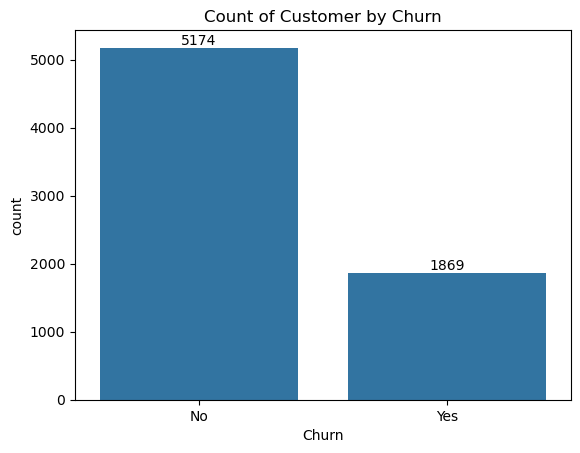

In [82]:
ax=sns.countplot(x=df['Churn'],data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn") 
plt.show()

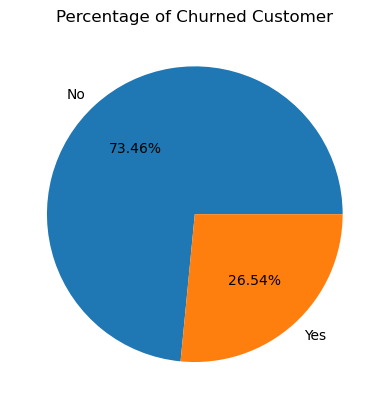

In [88]:
gb=df.groupby('Churn').agg({'Churn':"count"})
plt.title("Percentage of Churned Customer") 
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.show()

- **Overall churn rate is 26.54%, meaning about a quarter of customers leave.**  
- **Most customers (73.46%) remain, indicating a stable customer base.**  
- **Retention efforts should focus on understanding and reducing churn among the 26.54%.**  

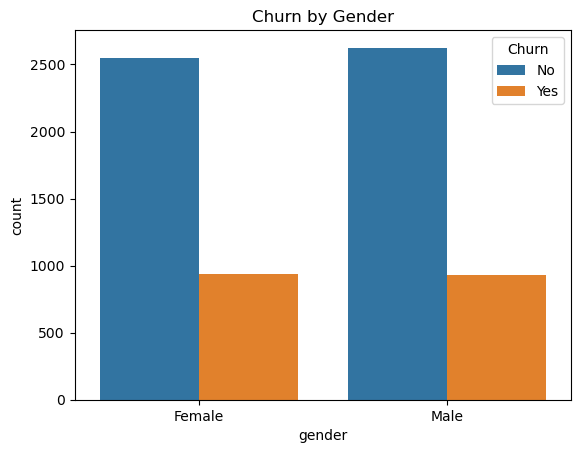

In [102]:
sns.countplot(x=df['gender'],data=df,hue='Churn')
plt.title("Churn by Gender")
plt.show()

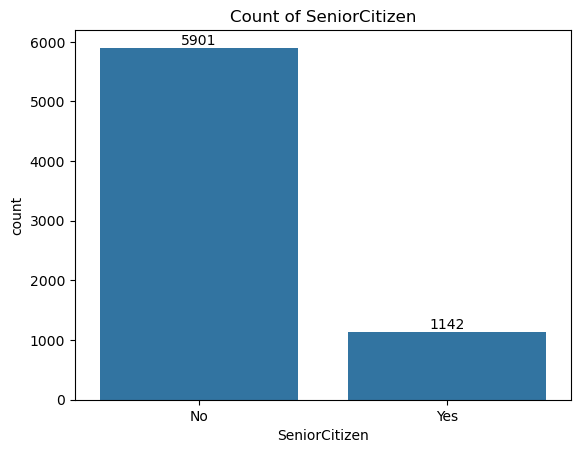

In [130]:
ax=sns.countplot(x=df['SeniorCitizen'],data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of SeniorCitizen") 
plt.show()

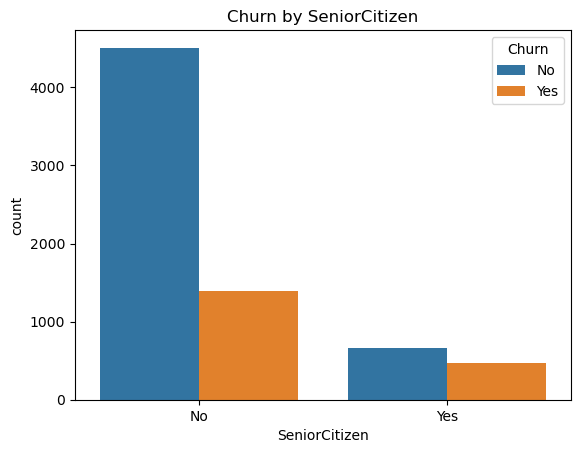

In [250]:
sns.countplot(x=df['SeniorCitizen'],data=df,hue='Churn')
plt.title("Churn by SeniorCitizen")
plt.show()

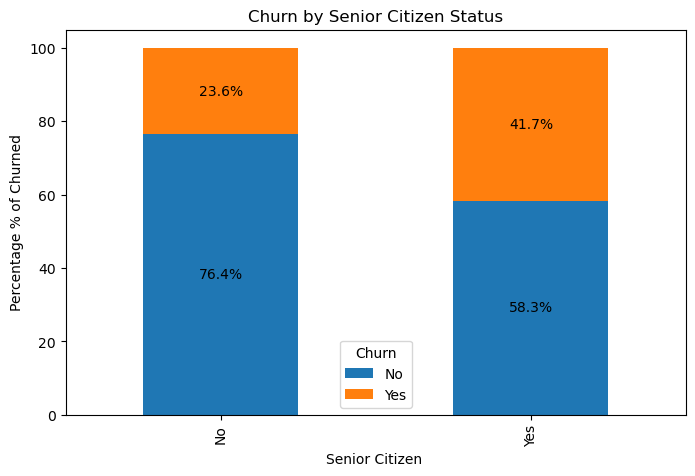

In [128]:
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
df_percent.plot(kind='bar', stacked=True, figsize=(8, 5))

for i, bars in enumerate(plt.gca().containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.gca().text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center', va='center', fontsize=10, color='black'
            )

plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen ")
plt.ylabel("Percentage % of Churned")
plt.legend(title="Churn")

# 📊 Churn by Senior Citizen Status  

- **Senior citizens have a higher churn rate (41.7%)** compared to non-seniors (23.6%).  
- **Non-senior customers tend to stay longer (76.4% retention)** than senior customers (58.3% retention).  
- **Targeted retention strategies** may be needed for senior customers.   

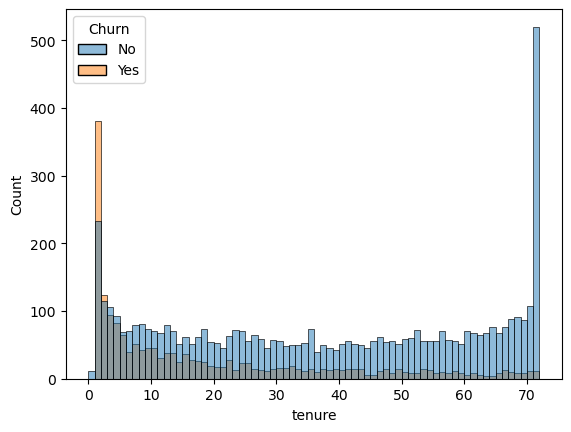

In [242]:
sns.histplot(x="tenure",data=df,bins=72,hue='Churn')
plt.show()

- **Churn is highest among customers with very low tenure, indicating early-stage churn is a major issue.**  
- **Customers with longer tenure tend to stay, with churn rates decreasing significantly over time.**  
- **Retention strategies should focus on engaging and retaining new customers to reduce early churn.**  

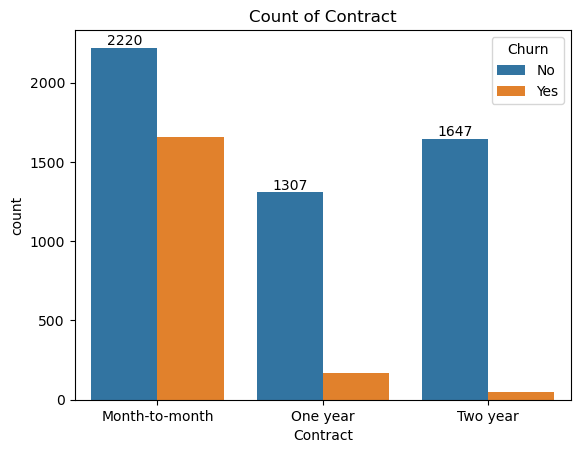

In [148]:
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Contract") 
plt.show()

- **Month-to-month contracts have the highest churn rate, with a significant number of customers leaving.**  
- **One-year and two-year contracts have much lower churn rates, indicating higher customer retention.**  
- **Longer contract durations may help reduce churn and improve customer loyalty.**  

In [152]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

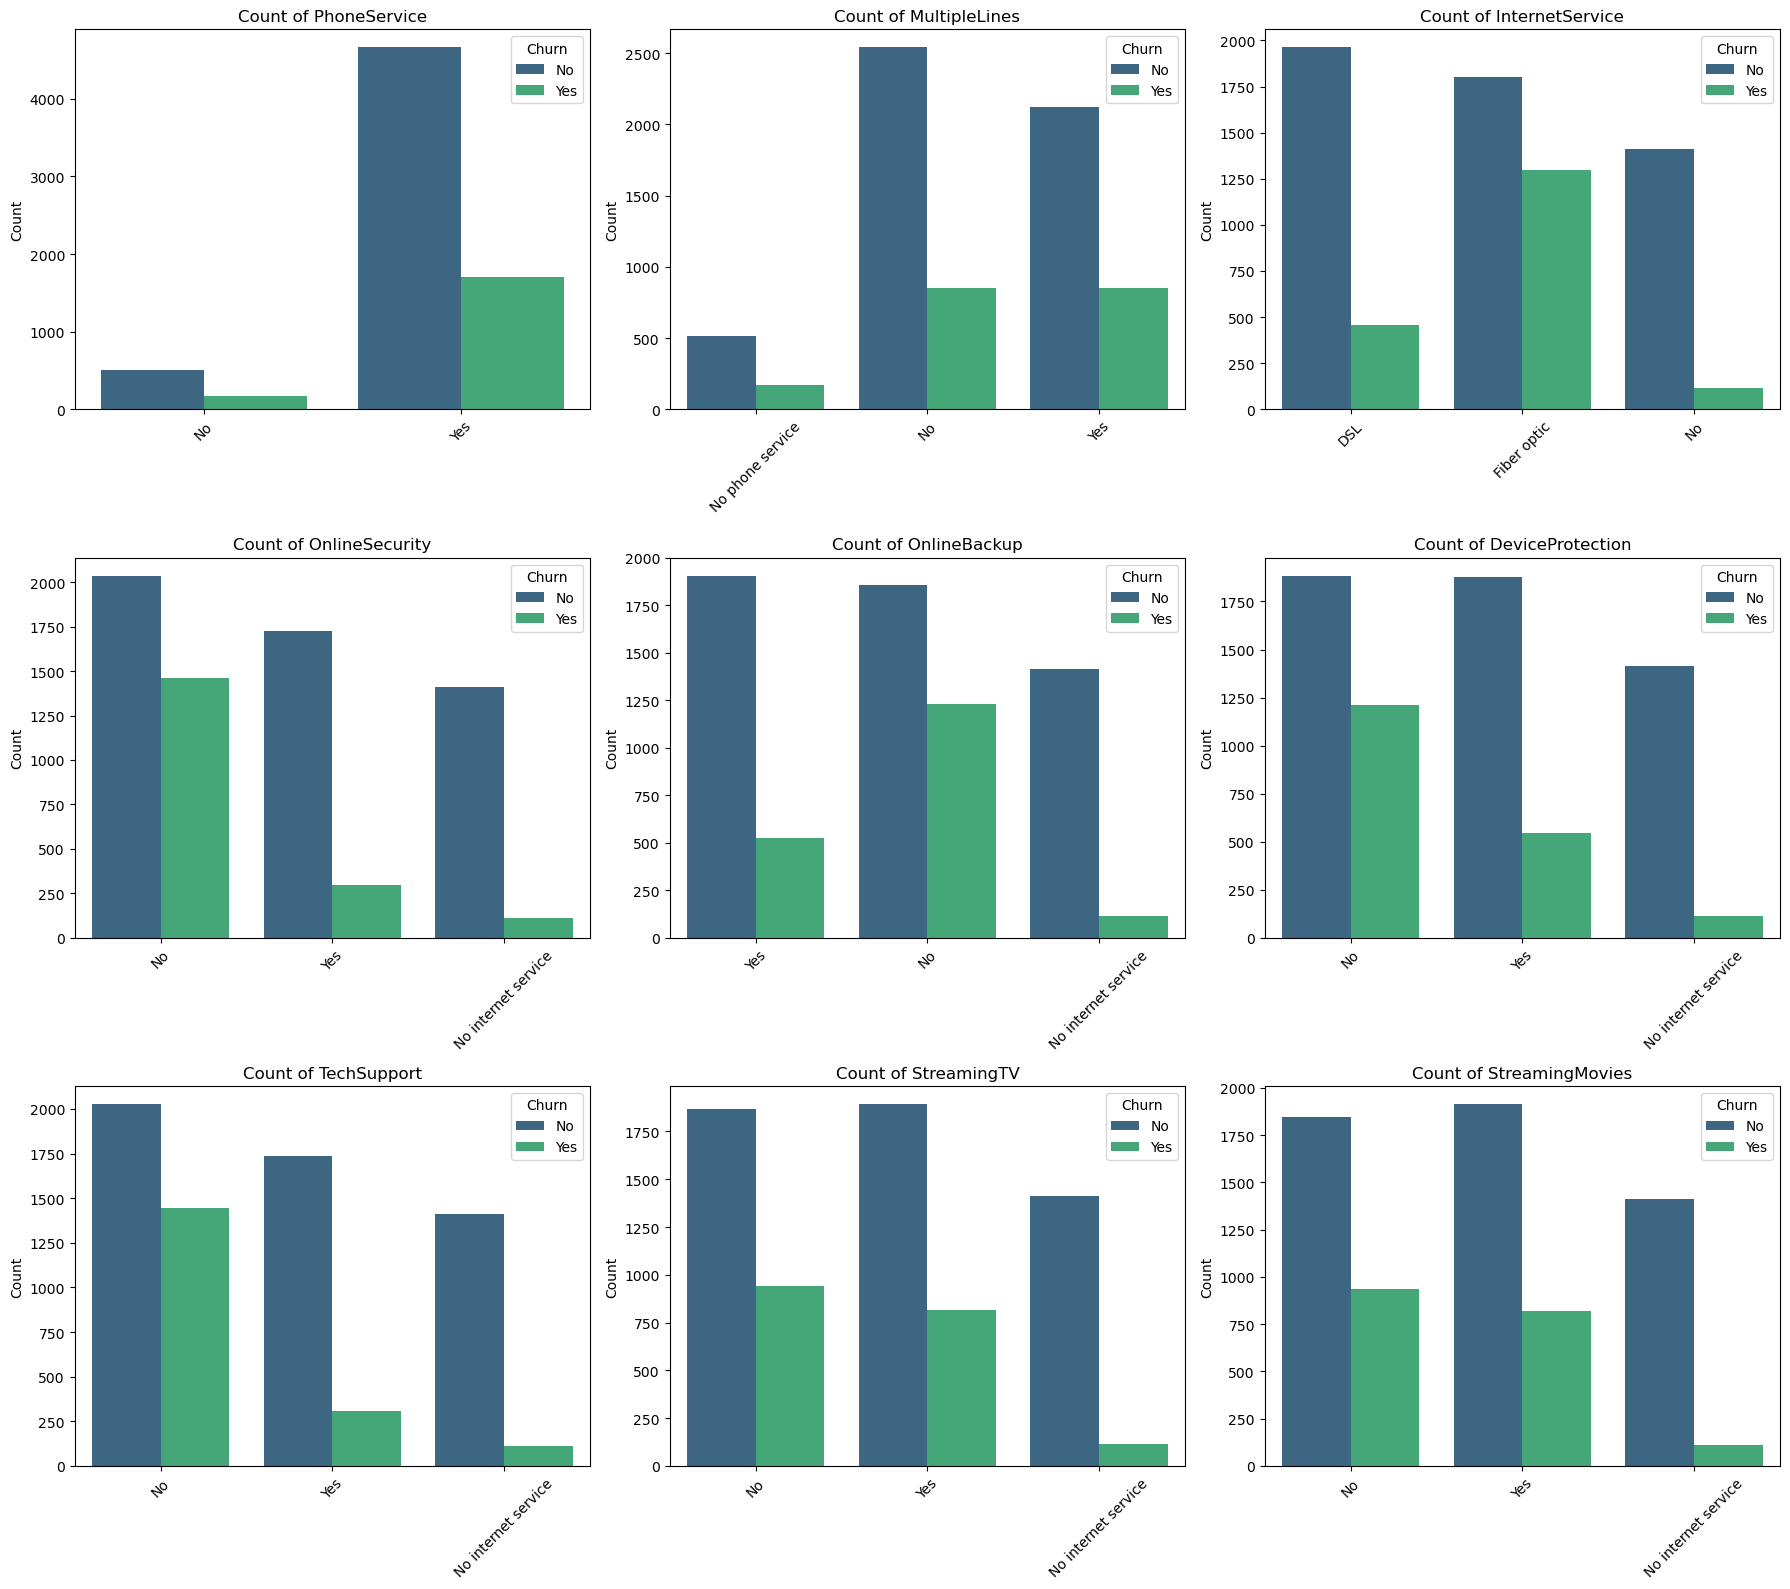

In [180]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 16))
axes = axes.flatten()  # Flatten to easily iterate

# Loop through columns and plot count plots
for i, col in enumerate(cols):
    sns.countplot(x=df[col], data=df, ax=axes[i],hue='Churn',palette="viridis")
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()

# 📊 Churn Analysis Summary  

- **Fiber Optic users** have higher churn than DSL users.  
- **Customers without online security, backup, or tech support churn more.**  
- **Streaming service users** have lower churn rates.  
- **Most customers have phone service; multiple lines don’t impact churn much.**  
- **Bundling additional services** may help reduce churn.   

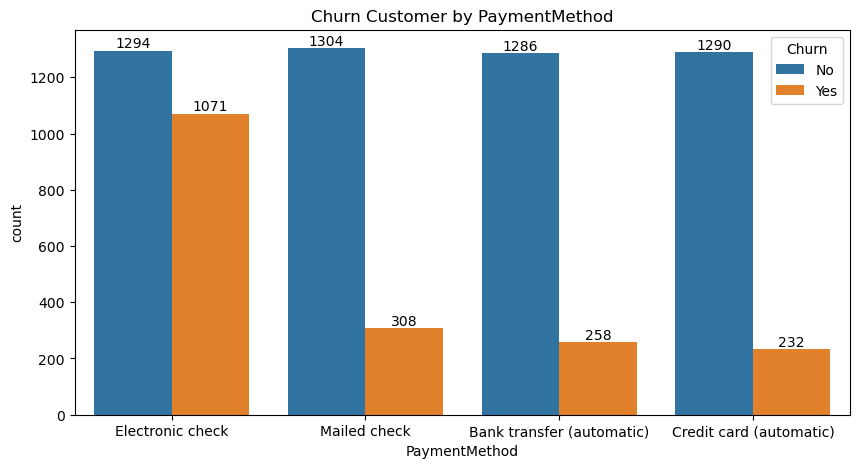

In [209]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Customer by PaymentMethod") 
plt.show()

- **Electronic check users have the highest churn rate (1,071 churned).**  
- **Automatic payment methods (Bank transfer & Credit card) have the lowest churn.**  
- **Enhancing customer experience for electronic check users may improve retention.**  

## Summary of Telco Customer Churn Analysis

- **Churn Rate**: 26.54% of customers have churned, while 73.46% remain.  
- **Senior Citizens**: Higher churn rate (41.7%) compared to non-seniors (23.6%).  
- **Payment Method**: Electronic check has the highest churn, while automatic payments have the lowest.  
- **Contract Type**: Month-to-month contracts see the highest churn, while longer-term contracts retain customers better.  
- **Tenure Impact**: Customers with very short tenure have the highest churn, while long-tenure customers remain loyal.  

### Key Takeaway  
To reduce churn, efforts should focus on **retaining senior citizens, encouraging long-term contracts, and promoting automatic payments**.